In [3]:
from pathlib import Path
from urllib.request import urlopen
from bs4 import BeautifulSoup
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import definitions

In [ ]:
plt.rcParams.update({
    "text.usetex": True,    
    "font.size": 12
})
img_dir = Path(definitions.ROOT_DIR + '/img/')

In [4]:
uf = urlopen('https://en.wikipedia.org/wiki/Electroencephalography')
html = uf.read()
soup = BeautifulSoup(html, 'html.parser')

In [5]:
txt = soup.get_text()
txt = txt.replace('\n', '')
txt

'Electroencephalography - Wikipediadocument.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-disabled vector-feature-page-tools-pinned-disabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=([^;]+)/);if(cookie){var featureName=cookie[1];document.documentElement.className=document.documentElement.className.replace(featureName+\'-enabled\',featureName+\'-disabled\');}}());RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"c0050e4a

In [6]:
count_vect = CountVectorizer()

In [7]:
txt_cnts = count_vect.fit_transform([soup.get_text()])
txt_cnts

<1x4806 sparse matrix of type '<class 'numpy.int64'>'
	with 4806 stored elements in Compressed Sparse Row format>

In [8]:
idx2word = {k:v for v, k in count_vect.vocabulary_.items()}

In [9]:
txt_cnts = txt_cnts.toarray().squeeze()
isort = np.argsort(-txt_cnts)
for idx in isort:
    print(f'{idx2word[idx]}: {txt_cnts[idx]}')

the: 720
of: 501
and: 348
in: 339
eeg: 333
to: 284
mw: 206
output: 199
parser: 196
is: 184
with: 142
brain: 127
as: 124
or: 115
for: 111
10: 110
are: 106
activity: 101
on: 98
be: 89
doi: 85
by: 81
from: 79
pmid: 77
an: 76
can: 75
that: 69
this: 64
it: 59
electrodes: 59
hlist: 56
artifacts: 54
used: 54
epilepsy: 54
signal: 52
clinical: 51
may: 49
navbox: 42
such: 42
research: 41
at: 41
alpha: 41
not: 40
edit: 40
electroencephalography: 38
hz: 38
other: 38
which: 37
margin: 35
have: 35
also: 35
s2cid: 35
li: 34
these: 34
electrode: 34
scalp: 33
some: 30
data: 30
frequency: 30
between: 29
has: 29
rhythm: 29
waves: 29
left: 29
artifact: 29
high: 28
first: 28
1016: 28
sleep: 28
was: 27
ext: 26
ambox: 26
when: 26
pmc: 25
using: 25
after: 25
journal: 25
child: 25
reference: 25
border: 25
most: 25
use: 25
electrical: 24
time: 24
potentials: 24
12: 24
seizure: 24
recording: 24
analysis: 23
wave: 23
range: 23
font: 23
signals: 23
one: 23
seen: 22
they: 22
citation: 21
neurons: 21
seizures: 21
ne

<BarContainer object of 4806 artists>

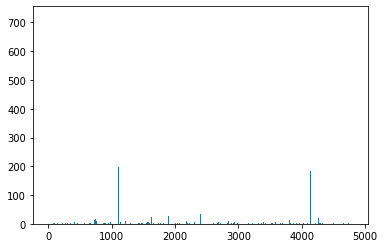

In [10]:
plt.bar(isort, txt_cnts)